## Analyze Adventure Works Cycles Data (The challenge - Data Analyst)

Adventure Works Cycles, a large wholesaler of bicycles in the US and Europe, has noticed that their total profits have been declining over the last few months. They have approached me to help them analyzing what are the drivers of this change.

The company’s IT department has provided me with the company’s sales data over the last few years. In the absence of any consultation with the business, I will need to examine this data on my own and decide which key elements I will focus on in my analysis.

In [369]:
# Import libraries
import pandas as pd
import statsmodels.api as sms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset
df = pd.read_csv('adventure_works_purchase_orders.csv')
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,LineItem_Id,Product_Category,Product_Sub_Category,Product_Name,Product_Code,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
0,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1,Bikes,Mountain Bikes,"Mountain-100 Black, 42",BK-M82B-42,1898.0944,3374.99,0.0,1,51.3415
1,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,2,Bikes,Mountain Bikes,"Mountain-100 Black, 44",BK-M82B-44,1898.0944,3374.99,0.0,3,51.3415
2,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,3,Bikes,Mountain Bikes,"Mountain-100 Black, 48",BK-M82B-48,1898.0944,3374.99,0.0,1,51.3415
3,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,4,Bikes,Mountain Bikes,"Mountain-100 Silver, 38",BK-M82S-38,1912.1544,3399.99,0.0,1,51.3415
4,SO43659,7/1/05,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,5,Bikes,Mountain Bikes,"Mountain-100 Silver, 42",BK-M82S-42,1912.1544,3399.99,0.0,1,51.3415


In [370]:
#Examine dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41884 entries, 0 to 41883
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SalesOrderNumber      41884 non-null  object 
 1   OrderDate             41884 non-null  object 
 2   DueDate               41884 non-null  object 
 3   ShipDate              41884 non-null  object 
 4   Sales_Person          41884 non-null  object 
 5   Sales_Region          41884 non-null  object 
 6   Sales_Province        41884 non-null  object 
 7   Sales_City            41884 non-null  object 
 8   Sales_Postal_Code     41884 non-null  int64  
 9   Customer_Code         41884 non-null  object 
 10  Customer_Name         41884 non-null  object 
 11  Customer_Region       41884 non-null  object 
 12  Customer_Province     41884 non-null  object 
 13  Customer_City         41884 non-null  object 
 14  Customer_Postal_Code  41884 non-null  object 
 15  LineItem_Id        

In [371]:
# Generate descriptive statistics
df.describe()

,Sales_Postal_Code,LineItem_Id,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost
count,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000
mean,62247.665314,42411.057683,480.189744,797.107599,0.005290,3.462539,41.917555
std,26180.477600,32307.450041,554.925952,915.681850,0.034575,2.982925,26.273406
min,2139.000000,1.000000,0.856500,2.290000,0.000000,1.000000,0.034400
25%,48226.000000,16647.750000,35.959600,61.920000,0.000000,2.000000,25.984800
50%,55802.000000,32940.500000,294.579700,539.990000,0.000000,3.000000,35.776700
75%,84407.000000,62801.250000,713.079800,1120.490000,0.000000,4.000000,50.405275
max,98055.000000,113563.000000,2171.294200,3578.270000,0.400000,44.000000,274.109100


Gross margin is a key metric that reflects the profitability of a business, as it provides insight into how much profit the company is generating from its sales and how effectively it is managing its costs.

From the descriptive analysis, it can be seen that the following metrics should be taken into consideration when calculating Gross Margin:
* Unit Price
* Unit Cost
* Unit Price Discount
* Unit Freight Cost

I will convert the Unit Price Discount from a percentage to its actual value to make the calculation easier.

In [372]:
# Convert Unit Price Discount from % to value
df['UnitPriceDiscount'] = df['UnitPriceDiscount']*df['UnitPrice'] 

# Calculate the Gross Margin per each order line
df['Gross_Margin'] = df['UnitPrice'] - (df['Unit_Cost'] + df['UnitPriceDiscount'] + df['Unit_Freight_Cost'])

Because I will have to analyze the data over a period of time, I will need to convert the date column into a datetime format and create a few new columns that will assist in the analysis.

In [373]:
# Convert the date column to a datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract the year from the date column
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Quarter'] = "Q" + df['OrderDate'].dt.quarter.astype(str)
df["Year_Quarter"] = df["Year"].astype(str) + ' ' + df["Quarter"].astype(str)

In [374]:
df.head()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Gross_Margin,Year,Month,Quarter,Year_Quarter
0,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1898.0944,3374.99,0.0,1,51.3415,1425.5541,2005,7,Q3,2005 Q3
1,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1898.0944,3374.99,0.0,3,51.3415,1425.5541,2005,7,Q3,2005 Q3
2,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1898.0944,3374.99,0.0,1,51.3415,1425.5541,2005,7,Q3,2005 Q3
3,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1912.1544,3399.99,0.0,1,51.3415,1436.4941,2005,7,Q3,2005 Q3
4,SO43659,2005-07-01,00:00.0,00:00.0,Tsvi Reiter,United States,Tennessee,Memphis,38103,AW00029825,...,1912.1544,3399.99,0.0,1,51.3415,1436.4941,2005,7,Q3,2005 Q3


In [375]:
df.describe()

,Sales_Postal_Code,LineItem_Id,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Gross_Margin,Year,Month
count,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000,41884.000000
mean,62247.665314,42411.057683,480.189744,797.107599,6.312306,3.462539,41.917555,268.687994,2006.751194,6.978536
std,26180.477600,32307.450041,554.925952,915.681850,67.318419,2.982925,26.273406,359.216192,0.862931,3.276386
min,2139.000000,1.000000,0.856500,2.290000,0.000000,1.000000,0.034400,-268.005400,2005.000000,1.000000
25%,48226.000000,16647.750000,35.959600,61.920000,0.000000,2.000000,25.984800,2.586500,2006.000000,4.000000
50%,55802.000000,32940.500000,294.579700,539.990000,0.000000,3.000000,35.776700,133.516200,2007.000000,7.000000
75%,84407.000000,62801.250000,713.079800,1120.490000,0.000000,4.000000,50.405275,382.497700,2007.000000,10.000000
max,98055.000000,113563.000000,2171.294200,3578.270000,1189.996500,44.000000,274.109100,1452.597300,2008.000000,12.000000


Next, I will create a plot that depicts the percentage of the gross margin in total revenue over a specific period of time. I have chosen to present only the years 2007 and 2008, as the profit decline has occurred over the past few months, and it is challenging to visually present the relevant information and identify key points where the problem started with a wider scope.

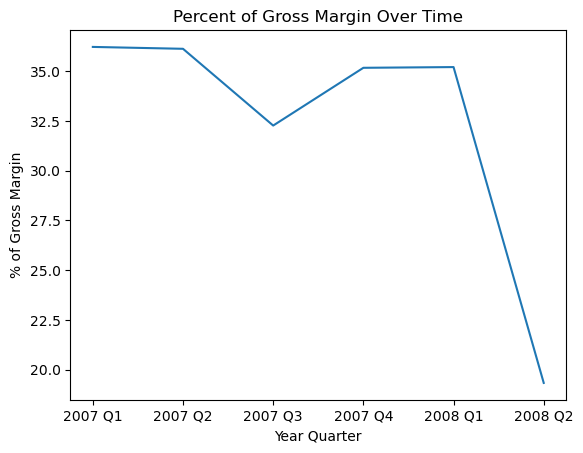

In [376]:
# Group the data by Year_Quarter. Including only results starting from 1st of January 2007
grouped = df.query('OrderDate >= "01-01-2007"').groupby(["Year_Quarter"])

# Calculate the percent of gross margin in revenue for each quarter
percent_gross_margin = grouped["Gross_Margin"].sum()/grouped['UnitPrice'].sum()*100

# Plot the % of gross margin over time
plt.plot(percent_gross_margin.index, percent_gross_margin.values)

# Add labels and title to the plot
plt.xlabel("Year Quarter")
plt.ylabel("% of Gross Margin")
plt.title("Percent of Gross Margin Over Time")

# Show the plot
plt.show()

The following chart will present the Revenue over time.

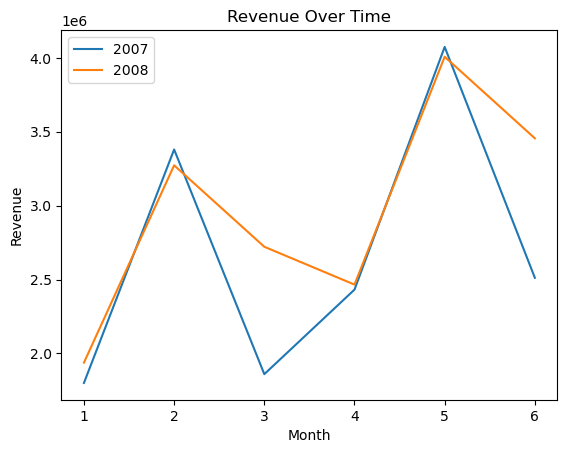

In [377]:
#Calclulate the revenue
df['Revenue'] = df["OrderQty"]*df['UnitPrice']

#Filtered data by year and quarter
df_2007_Q1Q2 = df[(df['Year'] == 2007) & ((df['Quarter'] == 'Q1') | (df['Quarter'] == 'Q2'))]
df_2008_Q1Q2 = df[(df['Year'] == 2008) & ((df['Quarter'] == 'Q1') | (df['Quarter'] == 'Q2'))]


#Group data by month
df_2007_Q1Q2 = df_2007_Q1Q2.groupby('Month').sum()
df_2008_Q1Q2 = df_2008_Q1Q2.groupby('Month').sum()


#Plot the data
fig, ax = plt.subplots()
ax.plot(df_2007_Q1Q2['Revenue'], label='2007')
ax.plot(df_2008_Q1Q2['Revenue'], label='2008')

# Add labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Revenue')
plt.title("Revenue Over Time")
ax.legend()

# Show the plot
plt.show()


**By comparing both charts, we can observe that the Revenue is relatively similar when compared to the results from the previous year. However, the percentage of gross margin has significantly declined over the past few months. From approximately 35% in the previous year, the gross margin has dropped to less than 20%.**

I checked the correlation matrix to obtain a general understanding of the pattern and correlation between variables.

In [378]:
correlation_matrix = df.corr()
round(correlation_matrix,2)

,Sales_Postal_Code,LineItem_Id,Unit_Cost,UnitPrice,UnitPriceDiscount,OrderQty,Unit_Freight_Cost,Gross_Margin,Year,Month,Revenue
Sales_Postal_Code,1.00,-0.07,0.02,0.02,0.02,0.05,0.10,0.02,-0.08,0.01,0.04
LineItem_Id,-0.07,1.00,-0.07,-0.12,-0.03,0.03,-0.19,-0.19,0.90,-0.22,-0.08
Unit_Cost,0.02,-0.07,1.00,0.99,0.15,-0.13,0.30,0.93,-0.10,-0.06,0.72
UnitPrice,0.02,-0.12,0.99,1.00,0.16,-0.13,0.32,0.96,-0.15,-0.05,0.72
UnitPriceDiscount,0.02,-0.03,0.15,0.16,1.00,0.01,0.06,-0.01,-0.02,-0.00,0.15
OrderQty,0.05,0.03,-0.13,-0.13,0.01,1.00,0.12,-0.14,0.05,0.05,0.26
Unit_Freight_Cost,0.10,-0.19,0.30,0.32,0.06,0.12,1.00,0.26,-0.21,-0.04,0.39
Gross_Margin,0.02,-0.19,0.93,0.96,-0.01,-0.14,0.26,1.00,-0.19,-0.03,0.68
Year,-0.08,0.90,-0.10,-0.15,-0.02,0.05,-0.21,-0.19,1.00,-0.48,-0.09
Month,0.01,-0.22,-0.06,-0.05,-0.00,0.05,-0.04,-0.03,-0.48,1.00,-0.02


A strong positive correlation does not necessarily mean that there is a causal relationship between the two variables (in this example Unit Price and Unit Cost), or that changes in one variable will always result in corresponding changes in the other. Just for the sake of experimentation, I ran a linear regression to see if I could predict the Unit Price based on the Unit Cost. It's important to note that this does not necessarily mean that Unit Cost is a valid factor or that this method is being used in an appropriate way. I was simply curious and wanted to try predicting the Unit Price based solely on this variable. As it turns out, if you multiply the Unit Price with 1.6362 and add 11.4201, you will sometimes get the actual price per product.

In [379]:
#Liner Regression
df['intercept'] = 1

lm = sms.OLS(df['UnitPrice'], df[['intercept', 'Unit_Cost']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              UnitPrice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.455e+06
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:01:56   Log-Likelihood:            -2.5945e+05
No. Observations:               41884   AIC:                         5.189e+05
Df Residuals:                   41882   BIC:                         5.189e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.4201      0.766     14.904      0.000       9.918      12.922
Unit_Cost      1.6362      0.001   1566.989      0.000       1.634       1.638
==============================================================================
Omnibus:                    19544.137   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           276362.165
Skew:                          -1.882   Prob(JB):                         0.00
Kurtosis:                      15.008   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The decreasing Gross Margin could be due to several factors, as represented by the formula: Cost, Price, Discount, or Freight Cost. I will examine each of these factors one by one.

In [380]:
#Group data by month, year
grouped = df.groupby(['Year','Month'])

# Calculate the percent of cost in revenue per month per year
cost_percent = grouped['Unit_Cost'].sum()/grouped['UnitPrice'].sum()

# Create a data frame from previous calculation
cost_percent_df = pd.DataFrame({'Year': cost_percent.index.get_level_values(0),
                                'Month': cost_percent.index.get_level_values(1),
                                'Cost_Percent': cost_percent.values})

In [381]:
#Examine last 5 results
cost_percent_df.tail()

,Year,Month,Cost_Percent
31,2008,2,0.596899
32,2008,3,0.599411
33,2008,4,0.743596
34,2008,5,0.743059
35,2008,6,0.744614


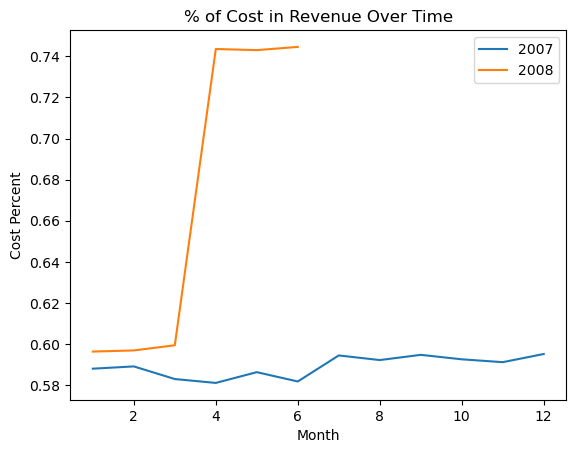

In [382]:
#Graphically present the previous calculations to compare the data over time.

#Filtered data by year
cost_percent_df_2007 = cost_percent_df[(cost_percent_df['Year'] == 2007)]
cost_percent_df_2008 = cost_percent_df[(cost_percent_df['Year'] == 2008)]

#Group data by month
cost_percent_df_2007 = cost_percent_df_2007.groupby('Month').sum()
cost_percent_df_2008 = cost_percent_df_2008.groupby('Month').sum()

#Plot the data
fig, ax = plt.subplots()
ax.plot(cost_percent_df_2007['Cost_Percent'], label='2007')
ax.plot(cost_percent_df_2008['Cost_Percent'], label='2008')

# Add labels and legend
ax.set_xlabel('Month')
ax.set_ylabel('Cost Percent')
ax.legend()

# Show the plot
plt.title("% of Cost in Revenue Over Time")
plt.show()


In [383]:
# Find the number of unique prices and costs grouped by product code.
df_unique = df.groupby(['Product_Code'])[['UnitPrice', 'Unit_Cost']].nunique().reset_index()

print('The number of unique products for which the prices changed more than once.:', df_unique.query('UnitPrice > 1').shape[0], 
      '\nThe number of unique products for which the costs changed more than once.:', df_unique.query('Unit_Cost > 1 ').shape[0])

The number of unique products for which the prices changed more than once.: 0 
The number of unique products for which the costs changed more than once.: 148


In [384]:
# Unique number of change per product
df_unique.nunique()

Product_Code    249
UnitPrice         1
Unit_Cost         2
dtype: int64

Based on the previous results, we can observe that the price per product has never changed over the years. We have 148 unique products that have changed their cost at some point, and I will investigate that further. Also, there are no products for which the cost changed more than once.

In [385]:
# Create a new data frame
df_cost_change = df[['Product_Code','OrderDate','Unit_Cost']]

# Drop Duplicates
df_cost_change = df_cost_change.drop_duplicates(ignore_index=True)
# Sort values by product code by date
df_cost_change = df_cost_change.sort_values(by=['Product_Code', 'OrderDate'])

# Group the data by product code 
grouped = df_cost_change.groupby('Product_Code')

# Create a new column Price_Change that stores the change in price for each product
df_cost_change['Cost_Change'] = grouped['Unit_Cost'].transform(lambda x: x.diff())

# Drop lines which did't detect price change
df_cost_change = df_cost_change[~((df_cost_change['Cost_Change'].isna()) | (df_cost_change['Cost_Change'] == 0))].reset_index()

# Drop index column
df_cost_change.drop(['index'], axis = 1, inplace = True)

#Rename columns
df_cost_change.rename(columns={'OrderDate': 'Change_Cost_Date'}, inplace=True)


In [386]:
#Group the data by the change cost date to see when this change occurs
df_cost_change.groupby(['Change_Cost_Date']).sum()

,Unit_Cost,Cost_Change
Change_Cost_Date,,
2008-04-01,81359.060000,16271.812000
2008-05-01,781.394875,156.278975
2008-06-01,44.949500,8.989900


We can see that there was a change in cost in April 2008 for the majority of products. This event aligns with the decrease in gross margin (and ultimately profit) that also started in April 2008.

In [387]:
# Calculate the % of cost increasing based on previous cost prices
df_cost_change['% of increasing']=(df_cost_change['Cost_Change']/df_cost_change['Unit_Cost']).round(2)
df_cost_change.describe()

,Unit_Cost,Cost_Change,% of increasing
count,148.000000,148.000000,1.480000e+02
mean,555.306786,111.061357,2.000000e-01
std,589.290094,117.858019,5.012968e-16
min,1.070625,0.214125,2.000000e-01
25%,50.111594,10.022319,2.000000e-01
50%,376.748500,75.349700,2.000000e-01
75%,891.349750,178.269950,2.000000e-01
max,1943.684875,388.736975,2.000000e-01


**The percentage of increasing cost was linear, and it was 20% for all products.**

In [388]:
# Merge the data frames to examine the structure of sales in the last few months
merged_df = pd.merge( df, df_cost_change, on='Product_Code', how='left')

# Create a new column 'Changed_Unit_Cost' based on the conditions: type 1 if the Unit Cost is changed and Change Cost Date happened before (or during) sales date
merged_df['Changed_Unit_Cost'] = ((merged_df['Product_Code'].notnull()) & (merged_df['OrderDate'] >= merged_df['Change_Cost_Date'])).astype(int)

merged_df.query('Year >= 2008 and Month > 3').groupby(['Changed_Unit_Cost']).nunique()

,SalesOrderNumber,OrderDate,DueDate,ShipDate,Sales_Person,Sales_Region,Sales_Province,Sales_City,Sales_Postal_Code,Customer_Code,...,Year,Month,Quarter,Year_Quarter,Revenue,intercept,Change_Cost_Date,Unit_Cost_y,Cost_Change,% of increasing
Changed_Unit_Cost,,,,,,,,,,,,,,,,,,,,,
1,277,3,1,1,10,2,9,10,10,277,...,1,3,1,1,479,1,3,53,53,1


We can see that starting from April 2008, all products have new prices.

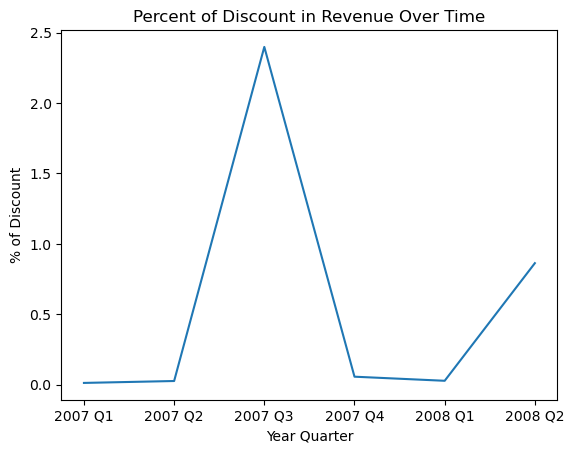

In [389]:
# Group the data by Year_Quarter. Including only results starting from 1st of January 2007
grouped = df.query('OrderDate >= "01-01-2007"').groupby(["Year_Quarter"])

# Calculate the percent of gross margin in revenue for each quarter
percent_price_discount = grouped["UnitPriceDiscount"].sum()/grouped['UnitPrice'].sum()*100

# Plot the % of gross margin over time
plt.plot(percent_price_discount.index, percent_price_discount.values)

# Add labels and title to the plot
plt.xlabel("Year Quarter")
plt.ylabel("% of Discount")
plt.title("Percent of Discount in Revenue Over Time")

# Show the plot
plt.show()

We can observe that the percentage of discounts in revenue increased compared to the previous quarter.

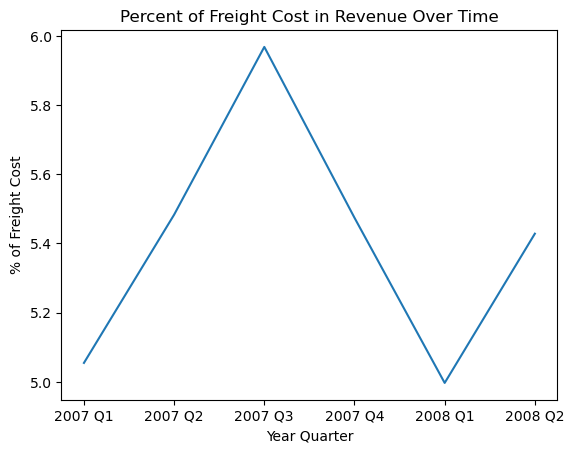

In [390]:
# Group the data by Year_Quarter. Including only results starting from 1st of January 2007
grouped = df.query('OrderDate >= "01-01-2007"').groupby(["Year_Quarter"])

# Calculate the percent of gross margin in revenue for each quarter
percent_freight_cost = grouped["Unit_Freight_Cost"].sum()/grouped['UnitPrice'].sum()*100

# Plot the % of gross margin over time
plt.plot(percent_freight_cost.index, percent_freight_cost.values)

# Add labels and title to the plot
plt.xlabel("Year Quarter")
plt.ylabel("% of Freight Cost")
plt.title("Percent of Freight Cost in Revenue Over Time")

# Show the plot
plt.show()

We can see that the percentage of freight cost in revenue slightly increased compared to the previous quarter. When comparing the freight cost with the same period of the previous year, we can observe that there is no significant difference and it should not affect significantly the gross margin at this point.